In [53]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage.morphology import disk
import skimage.measure as measures

def getImage(image):
    path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 4/'
    im = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    return im

Mean: 84.94305555555556
Standard deviation: 30.430765346150416


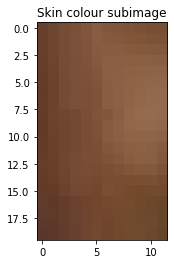

In [29]:
# QUESTION 1
path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 4/'
s1 = cv2.imread(path + 'signer_1.jpg')
s2 = cv2.imread(path + 'signer_2.jpg')
s3 = cv2.imread(path + 'signer_3.jpg')
i1 = cv2.cvtColor(s1, cv2.COLOR_BGR2RGB)
i2 = cv2.cvtColor(s2, cv2.COLOR_BGR2RGB)
i3 = cv2.cvtColor(s3, cv2.COLOR_BGR2RGB)

plt.imshow(i1)

# a
a = i1[160:180, 338:350, :]
plt.imshow(a)
plt.title("Skin colour subimage")

mean = np.mean(a)
std = np.std(a)
print("Mean: " + str(mean))
print("Standard deviation: " + str(std))

# b

9407
3297
2334
2284
1880
1764
1449
1246
1129
782
714
653
637
718
597


(0, 0)

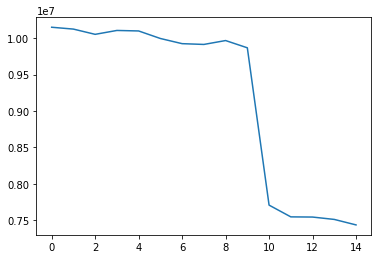

In [72]:
# QUESTION 2
disks = getImage('disks.jpg') # 512x512
parts = getImage('particles.jpg')

# erosion = cv2.erode(erosion, oct, iterations = 1)
# dilation = cv2.dilate(erosion2, oct, iterations = 1)

def Q2a(image, rs):
    # invert image
    s_a = []
    inv = cv2.bitwise_not(image)
    for r in range(rs):
        kernel = disk(r)
        # perform opening
        open = cv2.morphologyEx(inv, cv2.MORPH_OPEN, kernel)
        # plt.figure()
        # plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
        # plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
        # plt.imshow(open, cmap="gray")
        # calculate surface area
        s_a.append(np.sum(open))

        # use connected components
        labeled_image, nums = measures.label(open, connectivity=2, return_num=True)
        print(nums)
    
    r = range(rs)
    plt.figure()
    plt.plot(r, s_a)

    num_large = 0
    num_small = 0

    return num_large, num_small

Q2a(disks, 15)

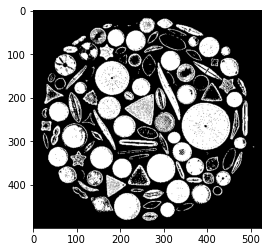

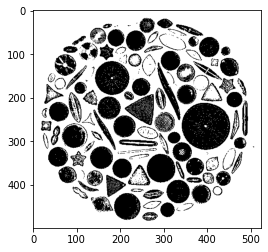

In [99]:
# QUESTION 3
d = getImage('diatoms.jpg')

# thresholding on original
(T, thresh) = cv2.threshold(d, 20, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure()
plt.imshow(thresh, cmap="gray")

# get inverse image
inv = cv2.bitwise_not(thresh)
plt.figure()
plt.imshow(inv, cmap="gray")

Text(0.5, 1.0, 'Boundary separating the regions')

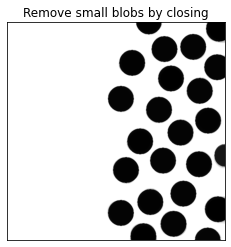

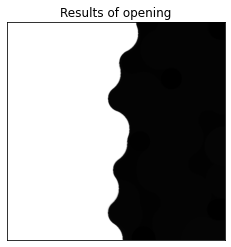

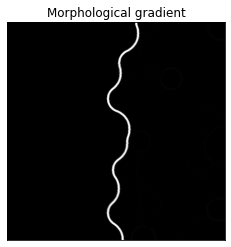

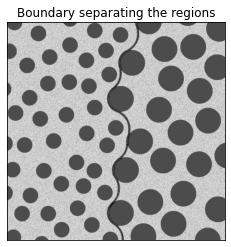

In [97]:
# QUESTION 4
blobs = getImage('blobs.jpg')
# find optimal r value
# for r in range(30):
#     kernel = disk(r)
#     c = cv2.morphologyEx(blobs, cv2.MORPH_CLOSE, kernel)
#     plt.figure()
#     plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
#     plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
#     plt.imshow(c, cmap="gray")
r1= 28
kernel1 = disk(r1)
c = cv2.morphologyEx(blobs, cv2.MORPH_CLOSE, kernel1)
plt.figure()
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.imshow(c, cmap="gray")
plt.title("Remove small blobs by closing")
r2= 52
kernel2 = disk(r2)
o = cv2.morphologyEx(c, cv2.MORPH_OPEN, kernel2)
plt.figure()
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.imshow(o, cmap="gray")
plt.title("Results of opening")

# calculate boundary
kernel = disk(3)
gradient = cv2.morphologyEx(o, cv2.MORPH_GRADIENT, kernel)
plt.figure()
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.imshow(gradient, cmap="gray")
plt.title("Morphological gradient")
g = cv2.bitwise_not(gradient)
# superimpose boundary onto original image
final = cv2.bitwise_and(blobs, g)
plt.figure()
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.imshow(final, cmap="gray")
plt.title("Boundary separating the regions")